In [27]:
import joblib
import os

# 🔹 8. Salvar os dados processados para uso posterior
print("💾 Salvando dados processados...")

# Criar diretório se não existir
os.makedirs("../data/processed", exist_ok=True)

# Salvar com joblib
joblib.dump(X_train, "../data/processed/X_train.pkl")
joblib.dump(X_test, "../data/processed/X_test.pkl")
joblib.dump(y_train, "../data/processed/y_train.pkl")
joblib.dump(y_test, "../data/processed/y_test.pkl")

print("✅ Dados salvos em ../data/processed/")


💾 Salvando dados processados...
✅ Dados salvos em ../data/processed/


In [29]:
# 📦 Importações
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 🔹 1. Lendo o dataset
print("🔹 1. Lendo o dataset...")
caminho_dataset = '../data/raw/dataset.csv'

try:
    df = pd.read_csv(caminho_dataset)
    print(f"✅ Dataset carregado: {df.shape}")
except FileNotFoundError:
    print(f"❌ Arquivo não encontrado no caminho: {caminho_dataset}")
    raise

# 🔹 2. Tratamento de valores nulos
print("🔹 2. Preenchendo valores nulos...")
df = df.fillna(0)

# 🔹 3. Separar a variável alvo
print("🔹 3. Separando variável alvo...")
y = df['status_fraude']
X = df.drop('status_fraude', axis=1)

# 🔹 4. Identificar colunas categóricas
print("🔹 4. Identificando colunas categóricas...")
colunas_categoricas = X.select_dtypes(include='object').columns.tolist()
print(f"✅ Colunas categóricas: {colunas_categoricas}")

# 🔹 5. One-Hot Encoding
print("🔹 5. Aplicando One-Hot Encoding...")
X_encoded = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True)
print(f"✅ Novo shape após encoding: {X_encoded.shape}")

# 🔹 6. Escalonamento
print("🔹 6. Escalando os dados...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
print("✅ Dados escalados.")

# 🔹 7. Split treino/teste
print("🔹 7. Dividindo em treino e teste...")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("✅ Divisão concluída.")


🔹 1. Lendo o dataset...
✅ Dataset carregado: (50000, 13)
🔹 2. Preenchendo valores nulos...
🔹 3. Separando variável alvo...
🔹 4. Identificando colunas categóricas...
✅ Colunas categóricas: ['tipo_estabelecimento', 'dispositivo', 'primeira_compra_estabelecimento']
🔹 5. Aplicando One-Hot Encoding...
✅ Novo shape após encoding: (50000, 17)
🔹 6. Escalando os dados...
✅ Dados escalados.
🔹 7. Dividindo em treino e teste...
✅ Divisão concluída.


In [31]:
# 📦 Importações
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🔹 1. Carregar dados preparados (ajuste o caminho conforme necessário)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Opcional: caso queira carregar de um arquivo intermediário salvo, use pickle
# with open('../data/processed/preprocessed_data.pkl', 'rb') as f:
#     X_train, X_test, y_train, y_test = pickle.load(f)

# Caso esteja rodando direto após pré-processamento, use as variáveis geradas
# Se preferir segurança, copie o pré-processamento aqui também

# 🔹 2. Treinar o modelo
print("🔹 Treinando modelo RandomForest...")
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
print("✅ Treinamento concluído.")

# 🔹 3. Avaliação
print("🔹 Avaliando o modelo...")
y_pred = modelo.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))

# 🔹 4. Matriz de confusão
print("\n🧩 Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# 🔹 5. Salvar o modelo treinado
print("💾 Salvando modelo em: ../models/modelo_fraude.pkl")
with open('../models/modelo_fraude.pkl', 'wb') as f:
    pickle.dump(modelo, f)

print("✅ Modelo salvo com sucesso.")


🔹 Treinando modelo RandomForest...
✅ Treinamento concluído.
🔹 Avaliando o modelo...

📊 Classification Report:
              precision    recall  f1-score   support

         Não       1.00      1.00      1.00     14850
         Sim       0.99      0.97      0.98       150

    accuracy                           1.00     15000
   macro avg       1.00      0.99      0.99     15000
weighted avg       1.00      1.00      1.00     15000


✅ Accuracy: 0.9996666666666667

🧩 Matriz de Confusão:
[[14849     1]
 [    4   146]]
💾 Salvando modelo em: ../models/modelo_fraude.pkl
✅ Modelo salvo com sucesso.


📒 Carregando modelo...
✅ Modelo carregado.

📊 Classification Report:
              precision    recall  f1-score   support

         Não       1.00      1.00      1.00     14850
         Sim       0.99      0.97      0.98       150

    accuracy                           1.00     15000
   macro avg       1.00      0.99      0.99     15000
weighted avg       1.00      1.00      1.00     15000

✅ Accuracy: 0.9996666666666667
✅ ROC AUC Score: 0.999996632996633


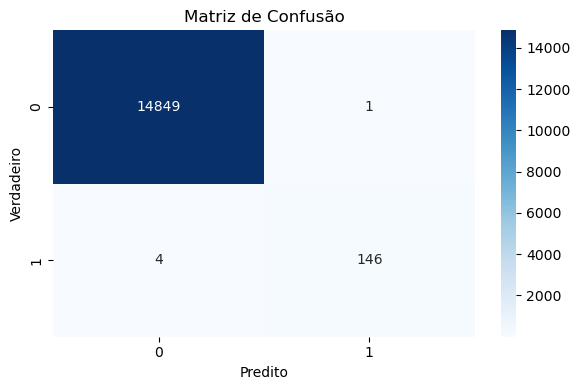

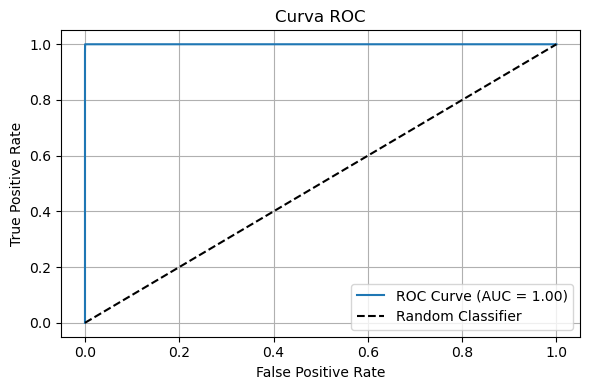

In [33]:
# 📦 Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import joblib

# 🔹 1. Carregar modelo e dados
print("\U0001f4d2 Carregando modelo...")
modelo = joblib.load("../models/modelo_fraude.pkl")
print("✅ Modelo carregado.")

# Carregar os dados de teste
X_test = joblib.load("../data/processed/X_test.pkl")
y_test = joblib.load("../data/processed/y_test.pkl")

# 🔧 Garantir que y_test esteja binário para métricas que precisam disso
y_test_bin = y_test.map({"Não": 0, "Sim": 1})

# 🔹 2. Fazer previsões
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]

# 🔹 3. Relatório de classificação
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("\u2705 Accuracy:", accuracy_score(y_test, y_pred))
print("\u2705 ROC AUC Score:", roc_auc_score(y_test_bin, y_proba))

# 🔹 4. Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.tight_layout()
plt.savefig('../outputs/figures/matriz_confusao.png')
plt.show()

# 🔹 5. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test_bin, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../outputs/figures/curva_roc.png')
plt.show()
